In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../feature_engineered_fight.csv')
clustered = pd.read_csv('../clustered_fighter.csv')

In [3]:
data

,method,referee,weightclass,winner,f1,f2,f1_slmp,f2_slmp,f1_str_acc_%,f2_str_acc_%,f1_sapm,f2_sapm,f1_str_def_%,f2_str_def_%,f1_td_avg,f2_td_avg,f1_td_acc_%,f2_td_acc_%,f1_td_def_%,f2_td_def_%,f1_sub_avg,f2_sub_avg,f1_height,f2_height,f1_weight,f2_weight,f1_reach,f2_reach,f1_stance,f2_stance
0,Decision - Unanimous,Herb Dean,featherweight,f1,Lerone Murphy,Edson Barboza,8.80,3.16,60.44,32.64,3.16,8.80,67.36,39.56,2.40,0.00,66,0,100,34,0.00,0.0,175.26,180.34,65.77,65.77,185.42,190.50,Orthodox,Orthodox
1,KO/TKO,Dan Miragliotta,welterweight,f1,Khaos Williams,Carlston Harris,8.00,9.33,60.00,46.67,9.33,8.00,53.33,40.00,0.00,0.00,0,0,100,100,0.00,0.0,182.88,182.88,77.11,77.11,195.58,193.04,Orthodox,Orthodox
2,Decision - Unanimous,Mark Smith,welterweight,f1,Themba Gorimbo,Ramiz Brahimaj,2.87,0.20,82.69,50.00,0.20,2.87,50.00,17.31,5.00,1.00,83,12,88,17,0.00,0.0,185.42,177.80,77.11,77.11,195.58,182.88,Orthodox,Orthodox
3,KO/TKO,Chris Tognoni,bantamweight,f1,Adrian Yanez,Vinicius Salvador,12.93,6.11,64.29,50.00,6.11,12.93,50.00,35.71,0.00,0.00,0,0,100,100,0.00,0.0,170.18,170.18,61.23,61.23,177.80,177.80,Orthodox,Southpaw
4,Submission,Herb Dean,strawweight,f1,Angela Hill,Luana Pinheiro,3.04,1.85,35.44,28.33,1.85,3.04,71.67,64.56,3.26,1.63,33,14,86,67,0.11,0.0,160.02,157.48,52.16,52.16,162.56,157.48,Orthodox,Orthodox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,Submission,John McCarthy,lightweight,f1,Jerry Bohlander,Nick Sanzo,3.08,0.00,50.00,0.00,0.00,3.08,0.00,50.00,23.08,0.00,100,0,100,0,1.54,0.0,180.34,175.26,90.26,86.18,185.29,179.62,Orthodox,Orthodox
7285,KO/TKO,John McCarthy,heavyweight,f1,Vitor Belfort,Tra Telligman,13.25,0.78,58.62,14.29,0.78,13.25,85.71,41.38,0.00,0.00,0,0,100,100,0.00,0.0,182.88,187.96,83.91,105.69,187.96,193.07,Southpaw,Orthodox
7286,KO/TKO,John McCarthy,heavyweight,f1,Scott Ferrozzo,Jim Mullen,3.73,0.37,71.43,60.00,0.37,3.73,40.00,28.57,3.73,0.00,100,0,100,0,0.12,0.0,180.34,185.42,146.51,97.52,185.29,190.38,Orthodox,Southpaw
7287,Decision - Unanimous,John McCarthy,lightweight,f1,Yoshiki Takahashi,Wallid Ismail,2.50,0.12,46.51,5.88,0.12,2.50,94.12,53.49,1.88,1.88,100,10,90,0,0.00,0.0,180.34,170.18,90.26,92.99,185.29,174.24,Southpaw,Orthodox


In [4]:
clustered = clustered[['name', 'cluster']]
clustered

,name,cluster
0,Lerone Murphy,5
1,Edson Barboza,5
2,Khaos Williams,3
3,Carlston Harris,0
4,Themba Gorimbo,5
...,...,...
2493,Frank Hamaker,2
2494,Thaddeus Luster,2
2495,David Levicki,2
2496,Ray Wizard,2


In [5]:
data['winner'].value_counts()

winner
f1    7289
Name: count, dtype: int64

In [6]:
# filter data where clear decision
data = data[data['winner'] == 'f1']
data['winner'].value_counts()

winner
f1    7289
Name: count, dtype: int64

In [7]:
data['method'].value_counts()

method
Decision - Unanimous    2645
KO/TKO                  2443
Submission              1435
Decision - Split         766
Name: count, dtype: int64

In [8]:
data = data[data['method'].isin(['Decision - Unanimous', 'Decision - Split'])]

In [9]:
data['method'].value_counts()

method
Decision - Unanimous    2645
Decision - Split         766
Name: count, dtype: int64

In [10]:

# Merge the cluster column from clustered DataFrame based on fighter names (f1 and f2)
data = pd.merge(data, clustered[['name', 'cluster']], left_on='f1', right_on='name', how='left')
data.rename(columns={'cluster': 'winner_cluster'}, inplace=True)

data = pd.merge(data, clustered[['name', 'cluster']], left_on='f2', right_on='name', how='left')
data.rename(columns={'cluster': 'loser_cluster'}, inplace=True)

In [11]:
odds_df = data[['winner_cluster', 'loser_cluster']]

In [12]:
odds_df.head(2)

,winner_cluster,loser_cluster
0,5,5
1,5,0


In [13]:
# filter data where clear decision
data = data[data['winner'] == 'f1']
data['winner'].value_counts()

winner
f1    3411
Name: count, dtype: int64

In [14]:
odds_df['winner_cluster'].value_counts()

winner_cluster
5    1379
0    1004
2     777
3     251
Name: count, dtype: int64

In [15]:
# Group by winner and loser clusters to count the number of wins and losses
win_counts = odds_df.groupby(['winner_cluster', 'loser_cluster']).size().unstack(fill_value=0)
loss_counts = odds_df.groupby(['loser_cluster', 'winner_cluster']).size().unstack(fill_value=0)

# Calculate win percentage by cluster matchup
win_percentage = (win_counts / (win_counts + loss_counts)) * 100
# Round win percentages to nearest integer
win_percentage_rounded = win_percentage.round()

# Display win percentages by cluster matchup
win_percentage_rounded.style.background_gradient(cmap='Blues', axis=None)

loser_cluster,0,1,2,3,5
0,50.000000,nan,56.000000,53.000000,36.000000
1,nan,nan,nan,nan,nan
2,44.000000,nan,50.000000,43.000000,31.000000
3,47.000000,nan,57.000000,50.000000,43.000000
5,64.000000,nan,69.000000,57.000000,50.000000


In [16]:
(win_counts + loss_counts)

,0,1,2,3,5
0,848.0,NaN,490.0,116.0,682.0
1,NaN,NaN,NaN,NaN,NaN
2,490.0,NaN,544.0,169.0,700.0
3,116.0,NaN,169.0,62.0,159.0
5,682.0,NaN,700.0,159.0,734.0


In [17]:
data.groupby(['weightclass', 'winner_cluster']).size().unstack(fill_value=0)

winner_cluster,0,2,3,5
weightclass,,,,
bantamweight,125,100,37,181
featherweight,136,87,18,169
flyweight,78,86,14,132
heavyweight,37,60,10,102
light heavyweight,56,46,21,123
lightweight,232,111,70,199
middleweight,119,78,39,153
strawweight,42,66,23,65
welterweight,179,143,19,255


In [18]:
data['weightclass'].value_counts()

weightclass
lightweight          612
welterweight         596
bantamweight         443
featherweight        410
middleweight         389
flyweight            310
light heavyweight    246
heavyweight          209
strawweight          196
Name: count, dtype: int64

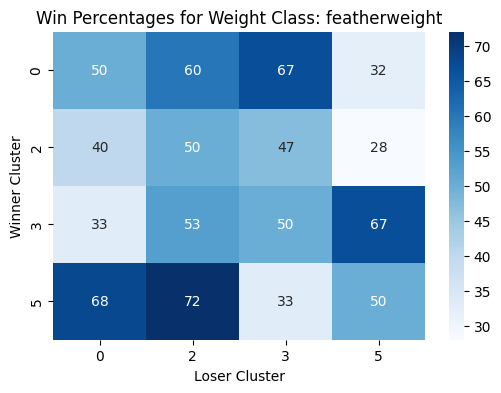

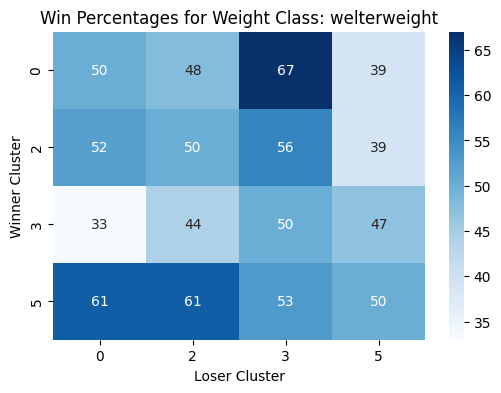

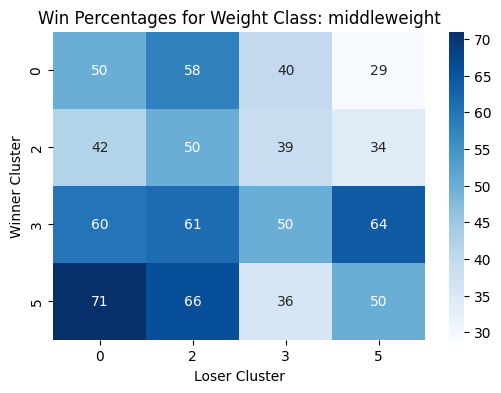

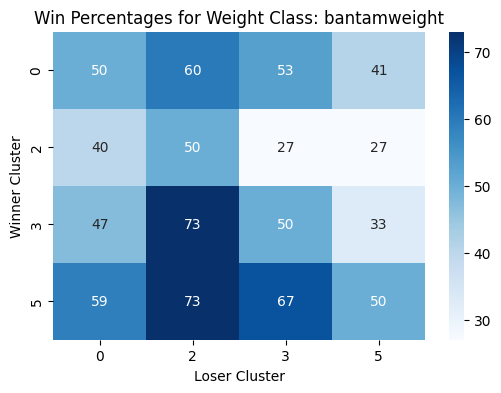

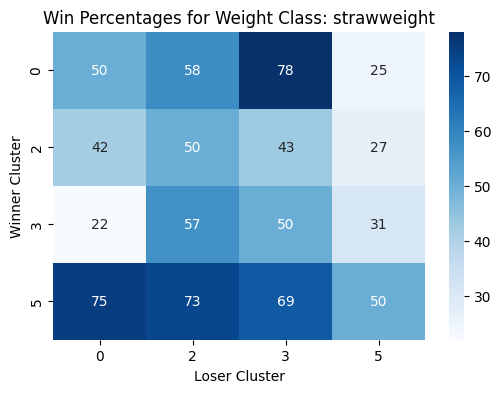

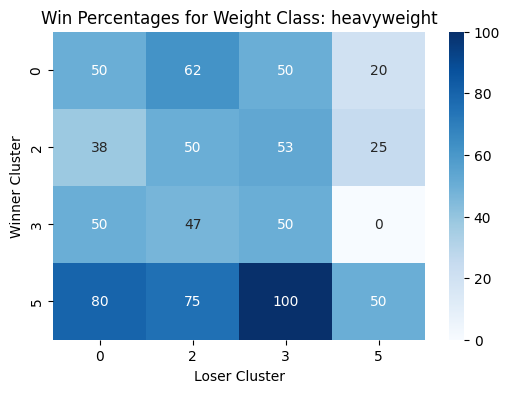

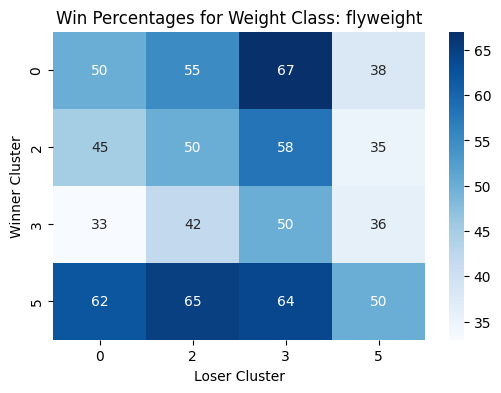

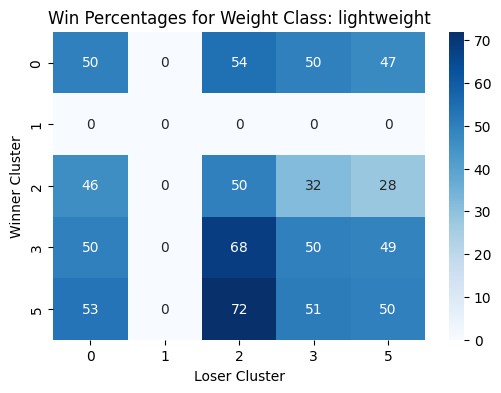

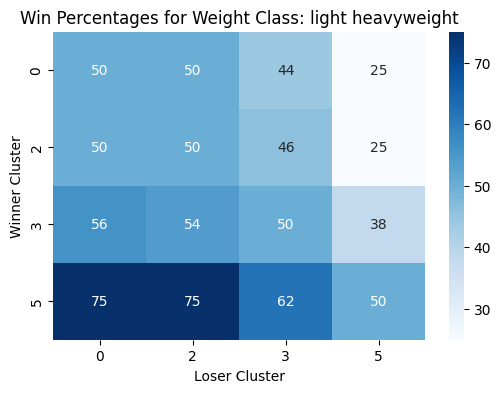

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate win percentages for a given weight class
def calculate_win_percentage(df):
    win_counts = df.groupby(['winner_cluster', 'loser_cluster']).size().unstack(fill_value=0)
    loss_counts = df.groupby(['loser_cluster', 'winner_cluster']).size().unstack(fill_value=0)
    win_percentage = (win_counts / (win_counts + loss_counts)) * 100
    return win_percentage.round().fillna(0)  # Round and fill NaN with 0

# List of unique weight classes
weight_classes = data['weightclass'].unique()

# Create a dictionary to store win percentages for each weight class
win_percentage_by_weight_class = {}

# Calculate win percentages for each weight class
for weight_class in weight_classes:
    df_filtered = data[data['weightclass'] == weight_class]
    win_percentage_by_weight_class[weight_class] = calculate_win_percentage(df_filtered)

# Plot each heatmap individually
for weight_class, win_percentage in win_percentage_by_weight_class.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(win_percentage, annot=True, cmap="Blues", fmt="g", cbar=True)
    plt.title(f'Win Percentages for Weight Class: {weight_class}')
    plt.xlabel('Loser Cluster')
    plt.ylabel('Winner Cluster')
    plt.show()


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate win percentages for a given weight class
def calculate_win_percentage(df):
    win_counts = df.groupby(['winner_cluster', 'loser_cluster']).size().unstack(fill_value=0)
    loss_counts = df.groupby(['loser_cluster', 'winner_cluster']).size().unstack(fill_value=0)
    win_percentage = (win_counts / (win_counts + loss_counts)) * 100
    return win_percentage.round().fillna(0)  # Round and fill NaN with 0

# List of unique weight classes in the desired order
weight_classes_ordered = ['strawweight', 'flyweight', 'bantamweight', 'featherweight', 
                          'lightweight', 'welterweight', 'middleweight', 
                          'light heavyweight', 'heavyweight']

# Create a dictionary to store win percentages DataFrames for each weight class
win_percentage_df_by_weight_class = {}

# Calculate win percentages for each weight class in the specified order
for weight_class in weight_classes_ordered:
    df_filtered = data[data['weightclass'] == weight_class]
    win_percentage_df_by_weight_class[weight_class] = calculate_win_percentage(df_filtered)

# Display the win percentages as styled DataFrames with background gradient
for weight_class, win_percentage_df in win_percentage_df_by_weight_class.items():
    print(f'Win Percentages for Weight Class: {weight_class}')
    display(win_percentage_df.style.background_gradient(cmap='Blues', axis=None))
    print('\n' + '='*50 + '\n')


Win Percentages for Weight Class: strawweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,58.000000,78.000000,25.000000
2,42.000000,50.000000,43.000000,27.000000
3,22.000000,57.000000,50.000000,31.000000
5,75.000000,73.000000,69.000000,50.000000




Win Percentages for Weight Class: flyweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,55.000000,67.000000,38.000000
2,45.000000,50.000000,58.000000,35.000000
3,33.000000,42.000000,50.000000,36.000000
5,62.000000,65.000000,64.000000,50.000000




Win Percentages for Weight Class: bantamweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,60.000000,53.000000,41.000000
2,40.000000,50.000000,27.000000,27.000000
3,47.000000,73.000000,50.000000,33.000000
5,59.000000,73.000000,67.000000,50.000000




Win Percentages for Weight Class: featherweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,60.000000,67.000000,32.000000
2,40.000000,50.000000,47.000000,28.000000
3,33.000000,53.000000,50.000000,67.000000
5,68.000000,72.000000,33.000000,50.000000




Win Percentages for Weight Class: lightweight


loser_cluster,0,1,2,3,5
0,50.000000,0.000000,54.000000,50.000000,47.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,46.000000,0.000000,50.000000,32.000000,28.000000
3,50.000000,0.000000,68.000000,50.000000,49.000000
5,53.000000,0.000000,72.000000,51.000000,50.000000




Win Percentages for Weight Class: welterweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,48.000000,67.000000,39.000000
2,52.000000,50.000000,56.000000,39.000000
3,33.000000,44.000000,50.000000,47.000000
5,61.000000,61.000000,53.000000,50.000000




Win Percentages for Weight Class: middleweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,58.000000,40.000000,29.000000
2,42.000000,50.000000,39.000000,34.000000
3,60.000000,61.000000,50.000000,64.000000
5,71.000000,66.000000,36.000000,50.000000




Win Percentages for Weight Class: light heavyweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,50.000000,44.000000,25.000000
2,50.000000,50.000000,46.000000,25.000000
3,56.000000,54.000000,50.000000,38.000000
5,75.000000,75.000000,62.000000,50.000000




Win Percentages for Weight Class: heavyweight


loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.000000,62.000000,50.000000,20.000000
2,38.000000,50.000000,53.000000,25.000000
3,50.000000,47.000000,50.000000,0.000000
5,80.000000,75.000000,100.000000,50.000000


> add to df to be able to visualize in tableau

In [21]:
win_percentage

loser_cluster,0,2,3,5
winner_cluster,,,,
0,50.0,50.0,44.0,25.0
2,50.0,50.0,46.0,25.0
3,56.0,54.0,50.0,38.0
5,75.0,75.0,62.0,50.0


In [22]:
data.columns

Index(['method', 'referee', 'weightclass', 'winner', 'f1', 'f2', 'f1_slmp',
       'f2_slmp', 'f1_str_acc_%', 'f2_str_acc_%', 'f1_sapm', 'f2_sapm',
       'f1_str_def_%', 'f2_str_def_%', 'f1_td_avg', 'f2_td_avg', 'f1_td_acc_%',
       'f2_td_acc_%', 'f1_td_def_%', 'f2_td_def_%', 'f1_sub_avg', 'f2_sub_avg',
       'f1_height', 'f2_height', 'f1_weight', 'f2_weight', 'f1_reach',
       'f2_reach', 'f1_stance', 'f2_stance', 'name_x', 'winner_cluster',
       'name_y', 'loser_cluster'],
      dtype='object')

In [23]:
# Calculate win percentage for f1 (winner)
f1_win_counts = data.groupby('winner_cluster').size().fillna(0)
f1_loss_counts = data.groupby('loser_cluster').size().fillna(0)
f1_win_percentage = (f1_win_counts / (f1_win_counts + f1_loss_counts)) * 100

# Calculate win percentage for f2 (loser)
f2_win_counts = data[data['winner'] == 'f2'].groupby('winner_cluster').size().fillna(0)
f2_loss_counts = data[data['winner'] == 'f2'].groupby('loser_cluster').size().fillna(0)
f2_win_percentage = (f2_win_counts / (f2_win_counts + f2_loss_counts)) * 100

# # Create a DataFrame to store the win percentages for f1 and f2
# win_percentages_f1_f2 = pd.DataFrame({
#     'winner_cluster': f1_win_percentage.index,
#     'f1_win_percentage': f1_win_percentage.values,
#     'f2_win_percentage': f2_win_percentage.values
# })

# # Merge the win percentage data with the original data
# data_with_win_percentages_f1_f2 = pd.merge(
#     data_with_win_percentages, 
#     win_percentages_f1_f2, 
#     how='left', 
#     on='winner_cluster'
# )

# # Check the merged DataFrame
# display(data_with_win_percentages_f1_f2.head())


In [24]:
# Calculate win counts for 'f1'
f1_win_counts = data.groupby('winner_cluster')['f1'].size().fillna(0)

# Calculate loss counts for 'f1'
f1_loss_counts = data.groupby('loser_cluster')['f1'].size().fillna(0)

# Calculate win percentage for 'f1'
f1_win_percentage = (f1_win_counts / (f1_win_counts + f1_loss_counts)) * 100

# Create a DataFrame to store the win percentages for 'f1'
win_percentages_f1 = pd.DataFrame({'winner_cluster': f1_win_percentage.index, 'f1_win_percentage': f1_win_percentage.values})

# Merge the win percentage data with the original data for 'f1'
data_with_win_percentages_f1 = pd.merge(data, win_percentages_f1, how='left', on='winner_cluster')


In [25]:
odds_df

,winner_cluster,loser_cluster
0,5,5
1,5,0
2,5,0
3,5,2
4,2,3
...,...,...
3406,2,2
3407,0,0
3408,2,2
3409,5,2
